<a href="https://colab.research.google.com/github/davidjustin1974/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling

In this Sprint Challenge you will use data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the Sprint Challenge!
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html]) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

## Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

## Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [31]:
cell_phones.dtypes

geo                   object
time                   int64
cell_phones_total    float64
dtype: object

In [8]:
population.dtypes

geo                 object
time                 int64
population_total     int64
dtype: object

In [0]:
geo_country_codes.dtypes

In [9]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [11]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
concat001 = pd.concat([cell_phones,population])

In [20]:
concat001.shape

(68512, 4)

In [0]:
concat002 = pd.concat([cell_phones,population],axis=1)

In [44]:
concat002.shape

(59297, 6)

In [0]:
concat003 = pd.concat([cell_phones,population],axis=0)

In [47]:
concat003.shape

(68512, 4)

In [0]:
merge002 = pd.merge(cell_phones,population)

In [49]:
merge002.shape

(8590, 4)

In [0]:
concat001.describe()

In [29]:
concat001.isnull().sum()

cell_phones_total    59297
geo                      0
population_total      9215
time                     0
dtype: int64

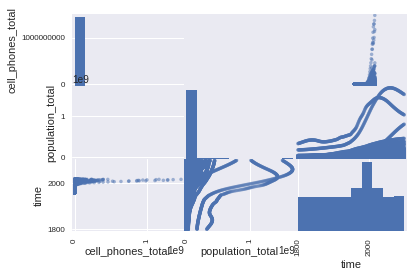

In [30]:
#remove the nulls?  Quick look at it say yes...

pd.plotting.scatter_matrix(concat001);

In [39]:
concat001.head(50)

,cell_phones_total,geo,population_total,time
0,0.0,abw,NaN,1960
1,0.0,abw,NaN,1965
2,0.0,abw,NaN,1970
3,0.0,abw,NaN,1975
4,0.0,abw,NaN,1976
5,0.0,abw,NaN,1977
6,0.0,abw,NaN,1978
7,0.0,abw,NaN,1979
8,0.0,abw,NaN,1980
9,0.0,abw,NaN,1981


In [0]:
removenan = concat001.dropna(axis=0, how='all')

In [37]:
removenan.shape

(68512, 4)

In [0]:
merge001 = pd.merge(cell_phones,population,
        how='inner',on='time')

In [0]:
merge001.shape

(1815355, 5)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [50]:
#the inner and join confused me.  I spent an hour on this trying to make it work.

merge002.shape

(8590, 4)

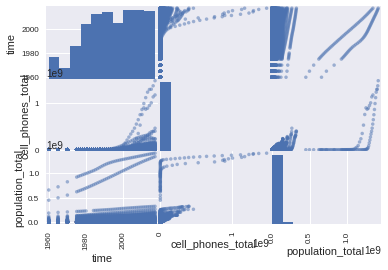

In [51]:
pd.plotting.scatter_matrix(merge002);

## Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [52]:
merge002.describe()

,time,cell_phones_total,population_total
count,8590.000000,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07
std,14.257975,5.573408e+07,1.161284e+08
min,1960.000000,0.000000e+00,4.433000e+03
25%,1983.000000,0.000000e+00,1.456148e+06
50%,1995.000000,6.200000e+03,5.725062e+06
75%,2006.000000,1.697652e+06,1.810581e+07
max,2017.000000,1.474097e+09,1.409517e+09


In [53]:
merge002.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


In [0]:
merge002['Cell Phones Per Person']=('Cell Phones Per Person')

In [61]:
merge002.head()

,geo,time,cell_phones_total,population_total,My new column,Cell Phones Per Person
0,afg,1960,0.0,8996351,Cell Phones Per Person,Cell Phones Per Person
1,afg,1965,0.0,9938414,Cell Phones Per Person,Cell Phones Per Person
2,afg,1970,0.0,11126123,Cell Phones Per Person,Cell Phones Per Person
3,afg,1975,0.0,12590286,Cell Phones Per Person,Cell Phones Per Person
4,afg,1976,0.0,12840299,Cell Phones Per Person,Cell Phones Per Person


In [64]:
merge002.isnull().sum()


geo                       0
time                      0
cell_phones_total         0
population_total          0
My new column             0
Cell Phones Per Person    0
dtype: int64

In [0]:
merge002['Cell Phones Per Person']=merge002['cell_phones_total']/merge002['population_total']

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
merge002['geo']= merge002['geo'].str.upper()

In [77]:
merge002.head()

,geo,time,cell_phones_total,population_total,My new column,Cell Phones Per Person
0,AFG,1960,0.0,8996351,Cell Phones Per Person,0.0
1,AFG,1965,0.0,9938414,Cell Phones Per Person,0.0
2,AFG,1970,0.0,11126123,Cell Phones Per Person,0.0
3,AFG,1975,0.0,12590286,Cell Phones Per Person,0.0
4,AFG,1976,0.0,12840299,Cell Phones Per Person,0.0


## Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
#think I'm supposed to merge my dataset from Part 1 & Part 2
#with the geo_country_codes.  Geo country codes has 272 countries.
#implied that only 195 have cell phones in the time period.
#will attempt to merge, melt, bake, broil the two datasets into one


geo_country_codes

In [0]:
part003df001 = pd.concat([merge002,geo_country_codes])

In [96]:
#cell phones total did not come over

part003df001.head().sum()

Cell Phones Per Person                                                    0
My new column             Cell Phones Per PersonCell Phones Per PersonCe...
alt_5                                                                     0
alternative_1                                                             0
alternative_2                                                             0
alternative_3                                                             0
alternative_4_cdiac                                                       0
arb1                                                                      0
arb2                                                                      0
arb3                                                                      0
arb4                                                                      0
arb5                                                                      0
arb6                                                                      0
cell_phones_

In [99]:
part003df001.value_counts()

AttributeError: ignored

In [91]:
part003df001.describe()

,Cell Phones Per Person,cell_phones_total,iso3166_1_numeric,latitude,longitude,population_total,time
count,8590.000000,8.590000e+03,247.000000,241.000000,241.000000,8.590000e+03,8590.000000
mean,0.279639,9.004950e+06,434.129555,17.479435,14.291928,2.983823e+07,1994.193481
std,0.454247,5.573408e+07,253.682663,25.920565,74.250901,1.161284e+08,14.257975
min,0.000000,0.000000e+00,4.000000,-90.000000,-176.200000,4.433000e+03,1960.000000
25%,0.000000,0.000000e+00,216.000000,1.289670,-40.000000,1.456148e+06,1983.000000
50%,0.001564,6.200000e+03,434.000000,16.750000,17.833330,5.725062e+06,1995.000000
75%,0.461149,1.697652e+06,653.000000,39.694500,48.000000,1.810581e+07,2006.000000
max,2.490243,1.474097e+09,894.000000,78.000000,179.144780,1.409517e+09,2017.000000


In [0]:
part003df002 = pd.merge(merge002,geo_country_codes)

In [0]:
part003df002.head(50)

In [98]:
#I realize that I'm supposed to pull the 2017 data out for every country
#then sort it by whoever had the most cell phones
#not proficent enough with coding right now.

#Feel very overwhelmed.
#To me?  Its like being given an english to japanese dictionary 
#and being told to write a novel in an hour.

#I barely grasp merging the data, let alone sorting it, manipulating it,
#and getting visual output from it.

#Give me all this in Excel?  I've got a fighting chance.

#I realize that Excel is output from thousands of codes like Python.

#Just not sure I can absorb, apply, and keep up.

#I'm deathly afraid of group projects right now because I absolutely HATE
#being the guy that is the absolute worst and brings nothing to the table.

#This is only Week 2...  And I am not a math wizard and I know that's
#coming too.

#This is all powerful & wonderful, but I'm not sure I can do this at this pace.

#I'm learning at the rate of a kindergarten class and this is moving along
#at Einstein/Ferrari levels/speed.

merge002.value_counts()

AttributeError: ignored

In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

## Part 4. Reshape data

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

#### OPTIONAL BONUS QUESTION!

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?